In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import h5py

## Dataset Loading, Visualize & Proprocessing

In [2]:
# Loading the data (cat/non-cat)
train_dataset = h5py.File('data/train_catvnoncat.h5', "r")
test_dataset = h5py.File('data/test_catvnoncat.h5', "r")

train_X_orig = torch.tensor( train_dataset['train_set_x'][:].reshape(209,-1).T, dtype=torch.float32)  # (d, m)=(12288, 209);  first (209,64,64,3) to (209,12288) then to (12288, 209)
train_Y = torch.tensor( train_dataset['train_set_y'][:].reshape(1,-1), dtype=torch.float32)           # (1, m)=(1, 209)

test_X_orig = torch.tensor( test_dataset['test_set_x'][:].reshape(50,-1).T, dtype=torch.float32)  # (12288, 50)
test_Y = torch.tensor( test_dataset['test_set_y'][:].reshape(1,-1), dtype=torch.float32)          # (1, 50)

train_X = train_X_orig/255.0
test_X = test_X_orig/255.0

In [3]:
print (f"Number of training examples: m_train = {train_X_orig.shape[1]}")
print (f"Number of testing examples: m_test = {test_X_orig.shape[1]}")
print ("Each image is of size: (64, 64, 3) \n")
print (f"train_X shape: {train_X.shape}")
print (f"train_Y shape: {train_Y.shape}")
print (f"test_X shape: {test_X.shape}")
print (f"test_Y shape: {test_Y.shape}")

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Each image is of size: (64, 64, 3) 

train_X shape: torch.Size([12288, 209])
train_Y shape: torch.Size([1, 209])
test_X shape: torch.Size([12288, 50])
test_Y shape: torch.Size([1, 50])


y = 1, it's a 'cat' picture.


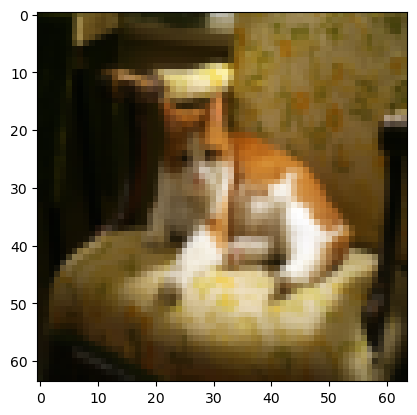

In [4]:
classes = test_dataset["list_classes"][:] # the list of classes
# Visualize sample picture
index = 7
plt.imshow(train_X_orig[:,index].numpy().astype(np.uint8).reshape(64,64,3))
print (f"y = {int(train_Y[0, index])}, it's a '{classes[int(train_Y[0, index])].decode('utf-8')}' picture.")

# Theory Hidden Layer Neural Network

## Old
$ \boldsymbol{X} = \begin{bmatrix} \boldsymbol x^1 & \boldsymbol{x}^2 & \dots & \boldsymbol x^m \end{bmatrix}  $ 
$ \qquad where \qquad 
\boldsymbol x^i = \begin{bmatrix} f_1 \\ f_2 \\ f_3 \\ \vdots \\ f_d \end{bmatrix}
\qquad \qquad \qquad$ 
<br>
So &emsp; $\boldsymbol X \rightarrow \color{purple}{\ shape: \ }\color{blue}{(d,m)} $ 
&emsp; where &emsp; $\boldsymbol x^i \rightarrow \color{purple}{\ shape: \ }\color{blue}{(d,1)}$
<br>
<br>
$ \boldsymbol{Y} = \begin{bmatrix} y^1 & y^2 & \dots & y^m \end{bmatrix} 
\qquad \qquad where \qquad 
y^i$ is 0/1
<br>
So &emsp; $\boldsymbol Y \rightarrow \color{purple}{\ shape: \ }\color{blue}{(1,m)}$ 

$$ 
\boldsymbol{W^{[l]}} = 
\begin{bmatrix} \bold {w_1} \\ \bold {w_2}  \\ \vdots \\ \bold {w_{n_l}} \end{bmatrix} =
\begin{bmatrix} ---\boldsymbol{\omega_1}^T--- \\ ---\boldsymbol{\omega_2}^T--- \\ \vdots \\ ---\boldsymbol{\omega_{n_l}}^T--- \end{bmatrix}
,\qquad \boldsymbol{b^{[l]}} = \begin{bmatrix} b_1 \\ b_2 \\ b_3  \\ \vdots  \\ b_{n_l} \end{bmatrix}
$$
$$ \boldsymbol{\omega_{n}} = \begin{bmatrix} w_1 \\ w_2 \\ w_3  \\ \vdots  \\ w_{n_{l-1}} \end{bmatrix}$$
So
<br>
$ \boldsymbol \omega \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_{l-1}, 1)}$
$,\qquad \qquad \bold w \rightarrow \color{purple}{\ shape: \ }\color{blue}{(1, n_{l-1})}$
<br>
$ \boldsymbol{W^{l}} \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_l, n_{l-1})}$
$ ,\qquad \enspace \boldsymbol{b} \rightarrow \color{purple}{\ shape: \ }\color{blue}{(n_l,)}$

$ \boldsymbol{Z^{[l]}} = \boldsymbol{W^{[l]} A^{[l-1]} +b}
\qquad \qquad
\color{purple}{ \ shape: \ } \color{blue}{(n_l,m)=(n_l,n_{l-1})\times(n_{l-1},m)} $
<br>
$ \boldsymbol{Z^{[l]}} = \begin{bmatrix} z^1 & z^2 & \dots & z^m \\
& \boldsymbol{z^{[l]}_{2}} \\ & \boldsymbol{z^{[l]}_{3}} \\ & \vdots \\ & \boldsymbol{z^{[l]}_{n_l}} \end{bmatrix} $

**Data**
<br>
$
\boldsymbol {X^{[0]}} = \boldsymbol {A^{[0]}} \qquad \qquad \
\color{purple}{shape: \qquad}\color{blue}{(n_x,m)=(d,m)} \color{default}
\\
\boldsymbol {Y}, \ \boldsymbol {\hat{Y}=A^{[2]}} \qquad \quad \ \
\color{purple}{shape: \qquad}\color{blue}{(n_y,m)=(1,m)} \color{default}
\\
\boldsymbol {W^{[1]}} \qquad \qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(n_h,n_x)=(n_h,d)} \color{default}
\\
\boldsymbol {W^{[2]}} \qquad \qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(n_y,n_h)=(1,n_h)} \color{default}
\\
\boldsymbol {b^{[1]}} \qquad \qquad \qquad \quad \enspace \
\color{purple}{shape: \qquad}\color{blue}{(n_h,1)} \color{default}
\\
\boldsymbol {b^{[2]}} \qquad \qquad \qquad \quad \enspace \
\color{purple}{shape: \qquad}\color{blue}{(n_y,1)=(1,1)} \color{default}
$

**Epoch**
<br>
$ \begin{rcases}
% \boldsymbol {Z^{[1]}} = \boldsymbol{W^{[1]}X} + \boldsymbol{b^{[1]}} 
% \qquad \qquad \qquad
% \color{purple}{shape: \qquad}\color{blue}{(n_h,m)=(n_h,d)\times(d,m)} \\
% or\\
\boldsymbol {Z^{[1]}} = \boldsymbol{W^{[1]}A^{[0]}} + \boldsymbol{b^{[1]}} 
\qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(n_h,m)=(n_h,n_x)\times(n_x,m)} \\
\displaystyle 
\boldsymbol {A^{[1]}} = g^{[1]}(\boldsymbol {Z^{[1]}}) 
\qquad \qquad \qquad \qquad
\color{purple}{shape: \qquad}\color{blue}{(n_h,m)} 
\\
\boldsymbol {Z^{[2]}} = \boldsymbol{W^{[2]}A^{[1]}} + \boldsymbol{b^{[2]}} 
\qquad \qquad \quad
\color{purple}{shape: \qquad}\color{blue}{(n_y,m)=(n_y,n_h)\times(n_h,m)} \\
\displaystyle 
\boldsymbol {A^{[2]}} = g^{[2]}(\boldsymbol {Z^{[2]}}) 
\qquad \qquad \qquad \qquad
\color{purple}{shape: \qquad}\color{blue}{(n_y,m)}
\end{rcases} 
\color{green} \text{forward propagation} $
<br>
<br>
$ \displaystyle \mathcal{J} = -\frac{1}{m} sum\{\bold Y\ ln(\boldsymbol{A^{[2]}})+(1-\bold Y)\ ln(1-\boldsymbol{A^{[2]}})\} 
\qquad \qquad
\color{purple}{shape: } \ \color{blue}{()}
\qquad \color{green} \text{cost function} $
<br>
<br>
$ \begin{rcases}
\boldsymbol{dZ^{[2]}} = \boldsymbol{A^{[2]}} - \bold{Y} 
\qquad \qquad \qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_y,m)} \\
\displaystyle 
\boldsymbol{dW^{[2]}}  = \frac{1}{m} \boldsymbol{dZ^{[2]}} \ \boldsymbol{A^{[1]}}^T 
\qquad \qquad \quad \ \color{purple}{shape: } \ \color{blue}{(n_y,n_h)=(n_y,m) \times (m,n_h)} \\
\displaystyle 
\boldsymbol{db^{[2]}} = \frac{1}{m} \ sum\{ \boldsymbol{dZ^{[2]}}, \text{axis=1} \} 
\qquad \color{purple}{shape: } \ \color{blue}{(n_y,1)} \qquad \qquad
\\
\\
\boldsymbol{dZ^{[1]}} = \boldsymbol{W^{[2]}}^T \boldsymbol{dZ^{[2]}} * g'^{[1]}(\boldsymbol{Z^{[1]}})
\qquad \color{purple}{shape: } \ \color{blue}{(n_h,m)=(n_h,n_y) \times (n_y,m)} \\
\displaystyle 
\boldsymbol{dW^{[1]}}  = \frac{1}{m} \boldsymbol{dZ^{[1]}} \ \boldsymbol{A^{[0]}}^T 
\qquad \qquad \quad \ \color{purple}{shape: } \ \color{blue}{(n_h,n_x)=(n_h,m) \times (m,n_x)} \\
\displaystyle 
\boldsymbol{db^{[1]}} = \frac{1}{m} \ sum\{ \boldsymbol{dZ^{[1]}}, \text{axis=1} \} 
\qquad \color{purple}{shape: } \ \color{blue}{(n_h,1)} \qquad \qquad
\end{rcases}
\color{green} \text{gradient descent} $
<br>
<br>
$ \begin{rcases}
\boldsymbol{W^{[1]}} = \boldsymbol{W^{[1]}}-\alpha \ \boldsymbol{dW^{[1]}} 
\qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_h,n_x)} \\
\boldsymbol{b^{[1]}} = \boldsymbol{b^{[1]}} - \alpha \ \boldsymbol{db^{[1]}} 
\qquad \qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_h,1)} \\
\boldsymbol{W^{[2]}} = \boldsymbol{W^{[2]}}-\alpha \ \boldsymbol{dW^{[2]}} 
\qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_y,n_h)} \\
\boldsymbol{b^{[2]}} = \boldsymbol{b^{[2]}} - \alpha \ \boldsymbol{db^{[2]}} 
\qquad \qquad \qquad \color{purple}{shape: } \ \color{blue}{(n_y,1)} \qquad
\end{rcases}
\color{green} \text{Update Parameters after epoch} $

To compute $\boldsymbol{dZ^{[1]}}$, you'll need to compute $g'^{[1]}(\boldsymbol{Z^{[1]}})$. 
<br>
Since $g^{[1]}(.)$ is the **tanh** activation function, if $a = g^{[1]}(.)$ then $g^{[1]'}(.) = 1-a^2$. 
<br>
So you can compute $g^{[1]'}(\boldsymbol{Z^{[1]}})$ using **(1 - np.power($\boldsymbol{A^{[1]}}$, 2))**.

# Model using custom z, gradient update, accuracy

In [5]:
def nn_1hidden_layer(train_X, train_Y, test_X, test_Y, n_h=7, num_epochs=2000, learning_rate=0.05, print_cost=False):
    """
    1 hidden layer neural network with tanh activation function while output layer has sigmoid activation.
    
    Parameters
    ----------
    train_X : Tensor [shape: (#features, #samples)]; dtype=tf.float32
    train_Y : Tensor [shape: (1, #samples)]; dtype=tf.float32

    Returns
    -------
    d: dictionary {train_Y_pred_out, test_Y_pred_out, costs, train_acc,
         W1,b1, W2,b2, learning_rate, num_epochs}
    train_Y_pred_out : Tensor [shape: (1, #samples)]; dtype=tf.float32
    W1 : Tensor [shape: (#units_in_layer1, #units_in_layer0)]; dtype: float32
    b1 : Tensor [shape: (#units_in_layer1, 1)]; dtype: float32
    W2 : Tensor [shape: (#units_in_layer2, #units_in_layer1)]; dtype: float32
    b2 : Tensor [shape: (#units_in_layer2, 1)]; dtype: float32
    costs: list of cost every 100 iteration
    """
    costs = []                                        # To keep track of the cost
    train_acc = []                                    # To keep track of the train accuracy

    ## layer_sizes
    n_x = train_X.shape[0] # size of input layer
    n_h = n_h        # size of hidden layer
    n_y = train_Y.shape[0] # size of output layer

    ## Initialize parameters
    np.random.seed(3)
    W1 = torch.tensor(np.random.randn(n_h, n_x) * 0.01, requires_grad=True, dtype=torch.float32)
    b1 = torch.zeros((n_h, 1), requires_grad=True)
    W2 = torch.tensor(np.random.randn(n_y, n_h) * 0.01, requires_grad=True, dtype=torch.float32)
    b2 = torch.zeros((n_y, 1), requires_grad=True)

    ## epochs loop
    for i in range(num_epochs): 
        ## Forward propagation(FROM X TO A2)
        Z1 = torch.mm(W1,train_X) + b1        # shape(n_h,m) = (n_h,d)(d,m) + (n_h,1)
        A1 = torch.tanh(Z1)             # shape(n_h,m)
        Z2 = torch.matmul(W2,A1) + b2   # shape(n_y,m) = (n_y,n_h)(n_h,m) + (n_y,1)
        A2 = 1/(1 + torch.exp(-Z2))     # shape(n_y,m)
        train_Y_pred = A2
        # cost = torch.nn.functional.binary_cross_entropy_with_logits(z, Y, reduction="mean")
        cost = torch.nn.functional.binary_cross_entropy(train_Y_pred, train_Y, reduction="mean")
        
        ## backward passs
        cost.backward()
        ## updata parameters
        W1.data = W1.data - learning_rate * W1.grad.data
        b1.data = b1.data - learning_rate * b1.grad.data
        W2.data = W2.data - learning_rate * W2.grad.data
        b2.data = b2.data - learning_rate * b2.grad.data
        ## zero the gradients before running the backward pass
        W1.grad.data.zero_()
        b1.grad.data.zero_()
        W2.grad.data.zero_()
        b2.grad.data.zero_()

        ## Record the costs
        if i % 100 == 0 or i == num_epochs-1:
            costs.append(cost.item())
            ## Binary Accuracy
            train_Y_pred_out = (train_Y_pred > 0.5).type(torch.float32) # shape(1,m) float32
            acc = torch.mean( (train_Y_pred_out == train_Y).type(torch.float32) )
            train_acc.append(acc.item()*100)
            ## Print the cost every 100 training epochs
            if print_cost:
                print(f"Cost in epochs {i+1}, {cost.item()}")

    ## Predict train/test set examples
    Z1 = torch.mm(W1,train_X) + b1        # shape(n_h,m) = (n_h,d)(d,m) + (n_h,1); float32
    A1 = torch.tanh(Z1)             # shape(n_h,m); float32
    Z2 = torch.matmul(W2,A1) + b2   # shape(n_y,m) = (n_y,n_h)(n_h,m) + (n_y,1); float32
    train_Y_pred = 1/(1 + torch.exp(-Z2)) # shape(n_y,m); float32
    train_Y_pred_out = (train_Y_pred > 0.5).type(torch.float32)   # shape(n_y,m); Tensor float32
    Z1 = torch.mm(W1,test_X) + b1    
    A1 = torch.tanh(Z1)          
    Z2 = torch.matmul(W2,A1) + b2
    test_Y_pred = 1/(1 + torch.exp(-Z2))
    test_Y_pred_out = (test_Y_pred > 0.5).type(torch.float32)

    ## Print train/test Errors
    if print_cost:
        acc = torch.mean( (train_Y_pred_out == train_Y).type(torch.float32) )
        print(f"train accuracy: { acc.item() *100 } %")
        acc = torch.mean( (test_Y_pred_out == test_Y).type(torch.float32) )
        print(f"test accuracy: { acc.item() *100 } %")

    d = { 
         "train_Y_pred_out" : train_Y_pred_out, "test_Y_pred_out" : test_Y_pred_out, 
         "costs": costs, "W1": W1, "b1": b1, "W2": W2, "b2": b2,
         "learning_rate" : learning_rate, "num_epochs": num_epochs}
    
    return d

## Run Model

In [6]:
nn_model = nn_1hidden_layer(train_X, train_Y, test_X, test_Y, n_h=6, num_epochs=2000, learning_rate=0.01, print_cost=True)

Cost in epochs 1, 0.6917737722396851
Cost in epochs 101, 0.6476465463638306
Cost in epochs 201, 0.6378868818283081
Cost in epochs 301, 0.6156297922134399
Cost in epochs 401, 0.5656183958053589
Cost in epochs 501, 0.49621284008026123
Cost in epochs 601, 0.45567190647125244
Cost in epochs 701, 0.4078065752983093
Cost in epochs 801, 0.36255839467048645
Cost in epochs 901, 0.3171166181564331
Cost in epochs 1001, 0.2760394513607025
Cost in epochs 1101, 0.2383783906698227
Cost in epochs 1201, 0.19141824543476105
Cost in epochs 1301, 0.3433581590652466
Cost in epochs 1401, 0.1242627501487732
Cost in epochs 1501, 0.10731758177280426
Cost in epochs 1601, 0.1058424562215805
Cost in epochs 1701, 0.08259317278862
Cost in epochs 1801, 0.0737752690911293
Cost in epochs 1901, 0.06660366803407669
Cost in epochs 2000, 0.06064505875110626
train accuracy: 99.52152967453003 %
test accuracy: 72.00000286102295 %


**Comment**: Training accuracy is close to 100%. This is a good sanity check: Test accuracy is 72%. The model is clearly overfitting the training data. It can be reduced by regularization technique and using more layers neural network to capture nonlinear complexity better.

## Plot results

y = 1, but y_pred = 1 so predicted that it is a 'cat' picture.


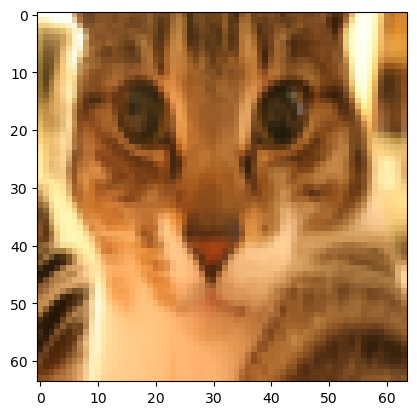

In [7]:
# Example of a picture that is rightly classified.
index = 3
plt.imshow(test_X_orig[:, index].numpy().astype(np.uint8).reshape(64,64,3))
print(f"y = {int(test_Y[:, index])}, but y_pred = {int(nn_model['test_Y_pred_out'][0, index])} so predicted that it is a '{classes[int(nn_model['test_Y_pred_out'][0, index])].decode('utf-8')}' picture.")

y = 0, but y_pred = 1 so you predicted that it is a 'cat' picture.


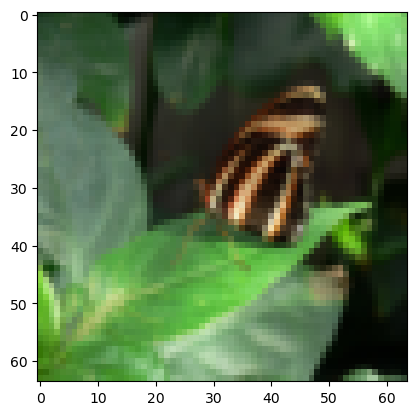

In [8]:
# Example of a picture that was wrongly classified.
index = 5
plt.imshow(test_X_orig[:, index].numpy().astype(np.uint8).reshape(64,64,3))
print(f"y = {int(test_Y[:, index])}, but y_pred = {int(nn_model['test_Y_pred_out'][0, index])} so you predicted that it is a '{classes[int(nn_model['test_Y_pred_out'][0, index])].decode('utf-8')}' picture.")

Let's also plot the cost function and the gradients.

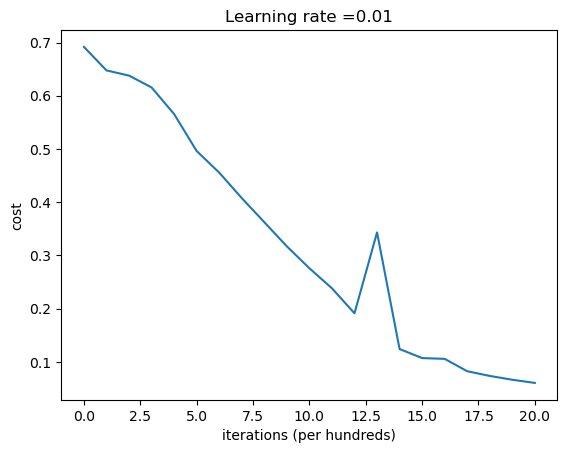

In [9]:
# Plot learning curve (with costs)
costs = np.squeeze(nn_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(nn_model["learning_rate"]))
plt.show()

**Interpretation**:
The cost decreasing shows that the parameters are being learned. However, could train the model even more on the training set. Increasing the number of iterations/epochs result in the training accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

# Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work, must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly change the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of `learning rates`. Run the cell below. 

Training a model with learning rate: 0.005

-------------------------------------------------------

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.05

-------------------------------------------------------

Training a model with learning rate: 0.1

-------------------------------------------------------



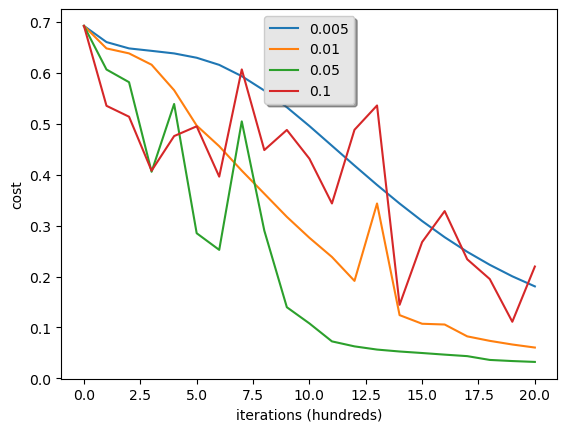

In [10]:
learning_rates = [0.005, 0.01, 0.05, 0.1]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = nn_1hidden_layer(train_X, train_Y, test_X, test_Y, n_h=6, num_epochs=2000, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.1), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you: 
    - Choose the learning rate that better minimizes the cost function.
    - If model overfits, use other techniques to reduce overfitting.


# Test with your own image ##

Use your own image and see the output of your model. To do that:<br>
1. Add image to this Jupyter Notebook's directory, in the "img" folder.<br>
2. Change your image's name in the following code<br>
3. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!<br>

y_pred = 0, neuron algorithm predicts a 'non-cat' picture.


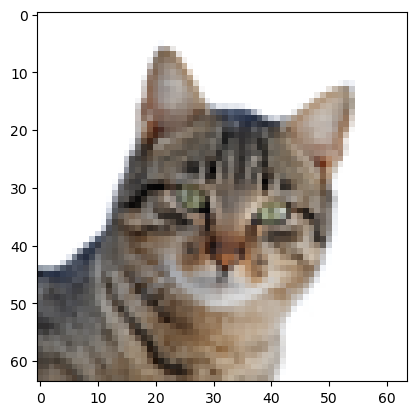

In [11]:
# change this to the name of your image file
my_image = "img/my_image_1.jpg"   

num_px = 64
# We preprocess the image to fit your algorithm.
image = np.array(Image.open(my_image).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T   # np.ndarray shape(12288, 1); float64
image = torch.tensor(image, dtype=torch.float32)   # shape(12288, 1); float32

W1=nn_model["W1"]; b1=nn_model["b1"]; W2=nn_model["W2"]; b2=nn_model["b2"]
Z1 = torch.mm(W1,image) + b1        # shape(n_h,m) = (n_h,d)(d,m) + (n_h,1); float32
A1 = torch.tanh(Z1)             # shape(n_h,m); float32
Z2 = torch.matmul(W2,A1) + b2   # shape(n_y,m) = (n_y,n_h)(n_h,m) + (n_y,1); float32
Y_pred = 1/(1 + torch.exp(-Z2)) # shape(n_y,m); float32                    
image_pred_out = (Y_pred > 0.5).type(torch.float32)    

print(f"y_pred = {int(image_pred_out)}, neuron algorithm predicts a '{classes[int(image_pred_out)].decode('utf-8')}' picture.")

y_pred = 1, neuron algorithm predicts a 'cat' picture.


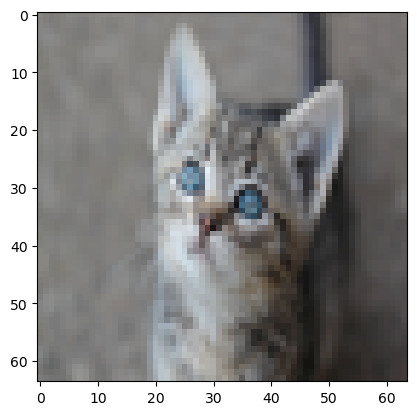

In [12]:
# change this to the name of your image file
my_image = "img/my_image_2.jpg"   

# We preprocess the image to fit your algorithm.
image = np.array(Image.open(my_image).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T    # np.ndarray shape(12288, 1)
image = torch.tensor(image, dtype=torch.float32)   # shape(12288, 1); float32

W1=nn_model["W1"]; b1=nn_model["b1"]; W2=nn_model["W2"]; b2=nn_model["b2"]
Z1 = torch.mm(W1,image) + b1        # shape(n_h,m) = (n_h,d)(d,m) + (n_h,1); float32
A1 = torch.tanh(Z1)             # shape(n_h,m); float32
Z2 = torch.matmul(W2,A1) + b2   # shape(n_y,m) = (n_y,n_h)(n_h,m) + (n_y,1); float32
Y_pred = 1/(1 + torch.exp(-Z2)) # shape(n_y,m); float32                    
image_pred_out = (Y_pred > 0.5).type(torch.float32)    

print(f"y_pred = {int(image_pred_out)}, neuron algorithm predicts a '{classes[int(image_pred_out)].decode('utf-8')}' picture.")